In [3]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

In [5]:
ds = pd.read_csv('usgs_earthquakes.csv')
ds

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


In [38]:
# We select the first 54 rows instead of 50 cause the last five earthquakes have the same magnitude.
top_54 = ds[['latitude','longitude','mag']].sort_values('mag', ascending=False).head(54)
top_54

,latitude,longitude,mag
37371,-19.6097,-70.7691,8.2
50562,51.8486,178.7352,7.9
36918,-20.5709,-70.4931,7.7
33808,-11.2701,162.1481,7.6
31496,-6.7547,155.0241,7.5
33537,-11.4633,162.0511,7.4
95913,12.5262,-88.1225,7.3
31850,17.3970,-100.9723,7.2
34318,-6.5858,155.0485,7.1
106285,1.8929,126.5217,7.1


Text(0.5, 1.0, 'Top 50 Earthquakes of 2014')

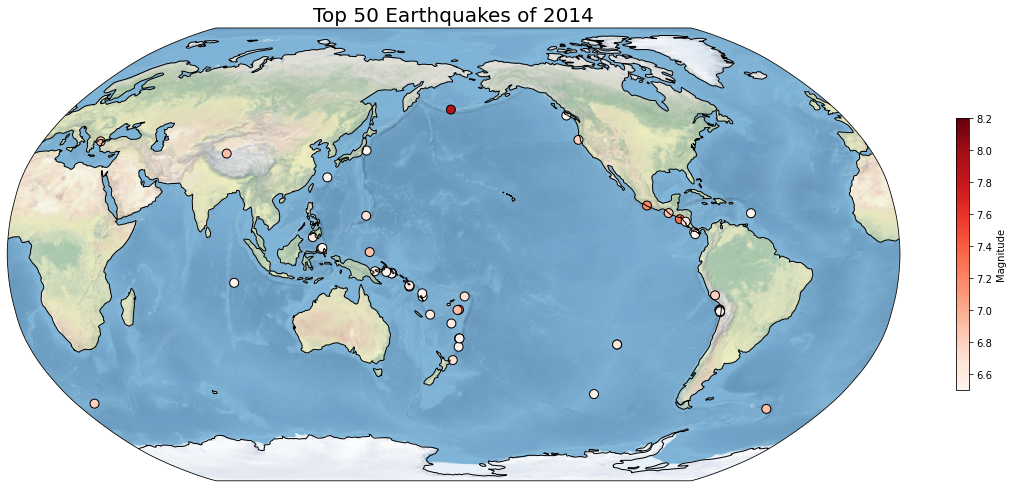

In [144]:
# We convert the data-array into numpy array format
lon = top_54['longitude'].to_numpy()
lat = top_54['latitude'].to_numpy()
mag = top_54['mag'].to_numpy()

# Set canvas size
fig = plt.figure(figsize=(20, 10))

# Load project
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.stock_img()
ax.coastlines()

# Add data, colorbar and title
plt.scatter(lon, lat, c=mag, cmap='Reds',s=80, edgecolors='black', transform=ccrs.PlateCarree())
plt.colorbar(label='Magnitude', shrink=0.5)
ax.set_title('Top 50 Earthquakes of 2014', fontsize=20)

In [4]:
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine='netcdf4')
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

Text(-170, -15, 'Niño 3.4 Area(5N-5S, 170W-120W)')

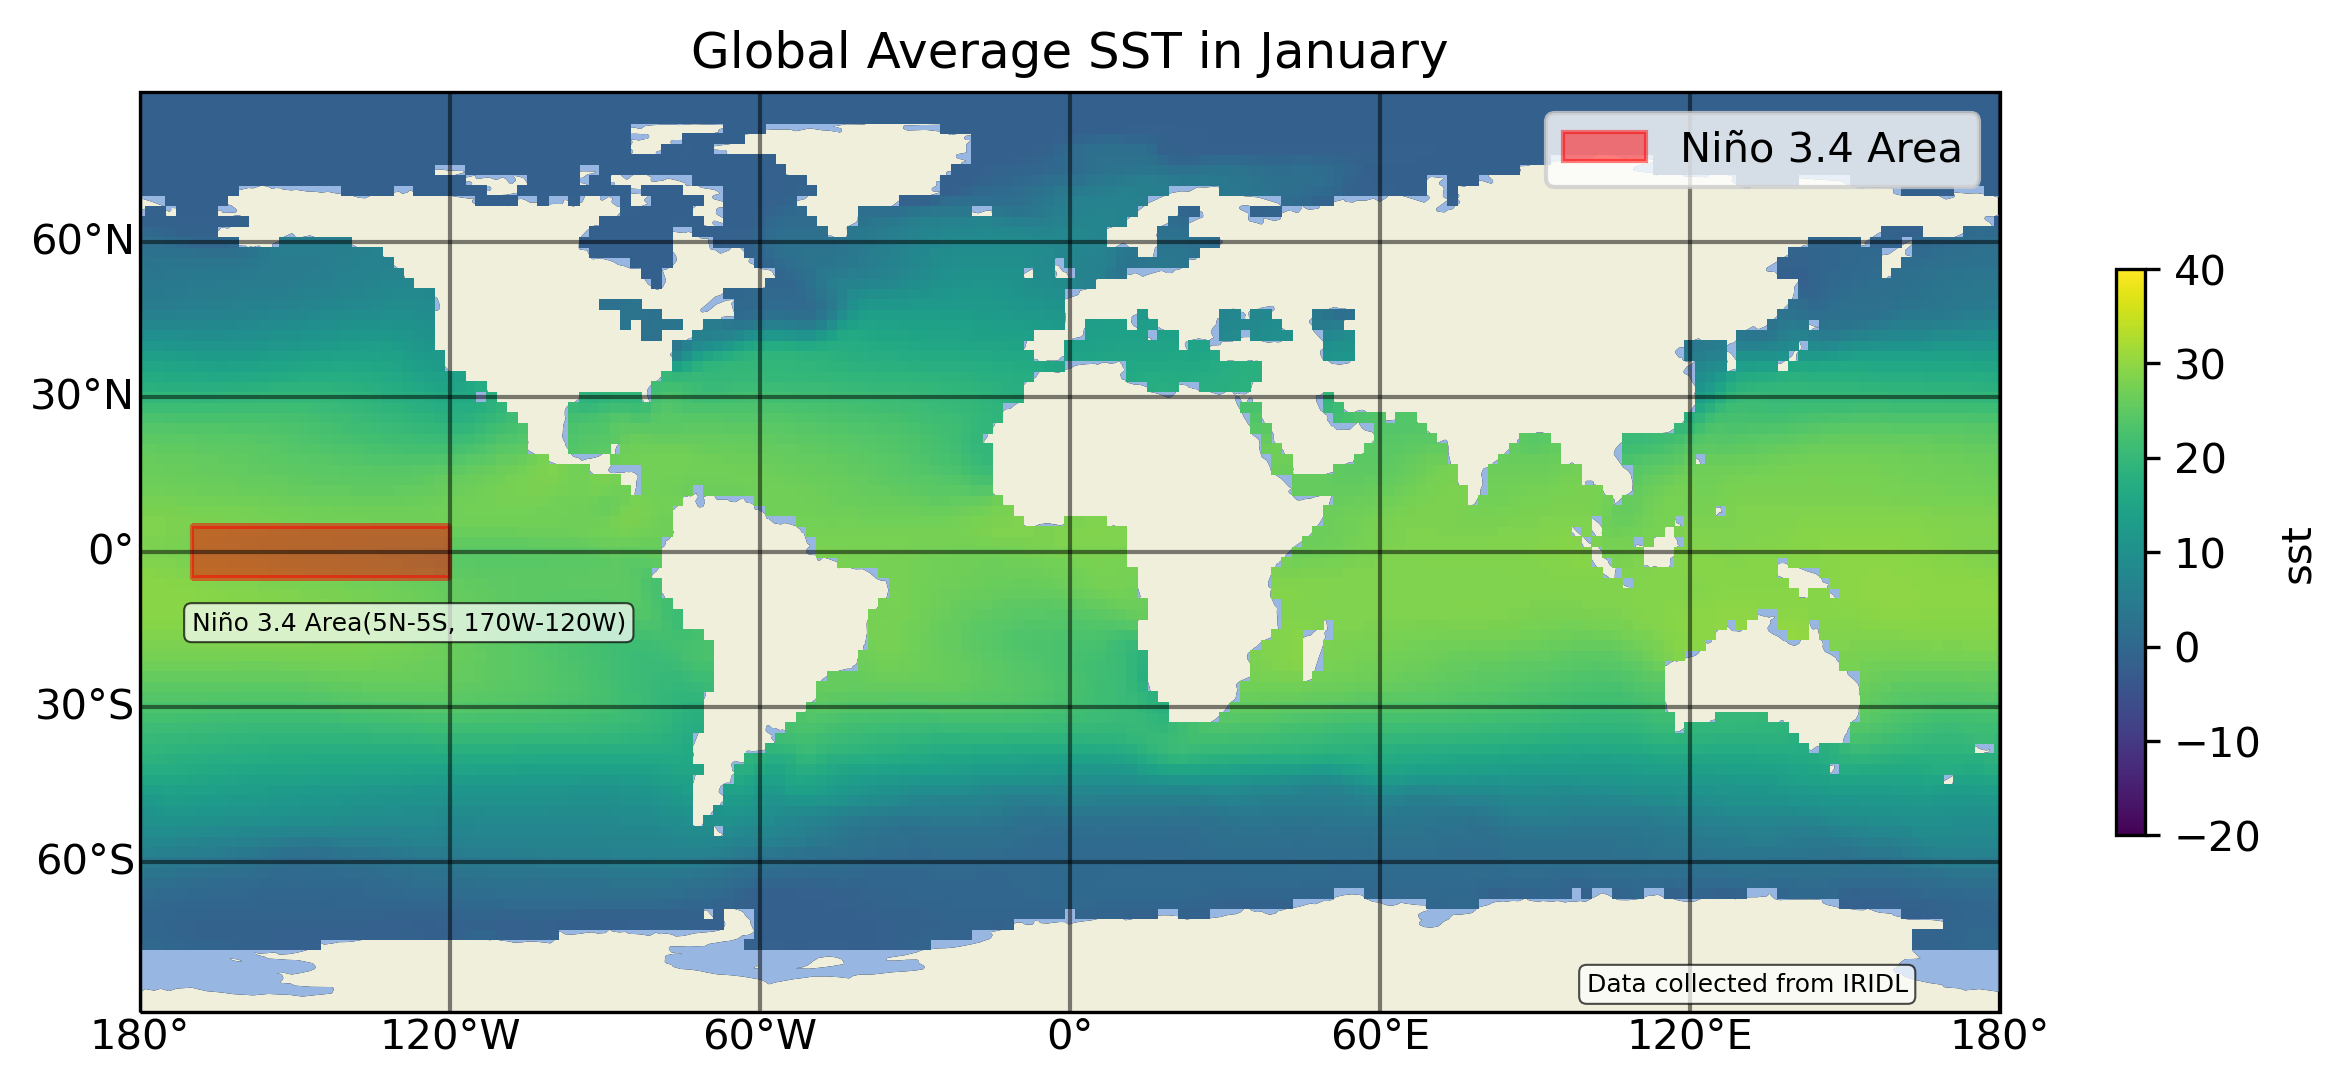

In [213]:
mn_clim = ds.sst.groupby(ds.sst.time.dt.month).mean()
lat = mn_clim[0].lat.to_numpy()
lon = mn_clim[0].lon.to_numpy()

# Create and define the size of the canvas
plt.figure(figsize=(10,5), dpi=300)

# Create an axes with an basic PlateCarree projection style
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

# Add x-axis, y-axis labels and ticks
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)
gl.top_labels = False
gl.right_labels = False

# Add LAND and Ocean feature to axes
ax.add_feature(cfeature.LAND, edgecolor='black', zorder=0)
ax.add_feature(cfeature.OCEAN, zorder=0)


# Plot the SST with colorbar
mn_clim[0].plot(ax=ax, transform=ccrs.PlateCarree(),vmin=-20, vmax=40, cbar_kwargs={'shrink': 0.5})

# Add figure title
plt.title('Global Average SST in January')

#Label the Niño 3.4 area and add the legend
x1 = [-170, -120]
plt.fill_between(x1, -5, 5, color='r', alpha=0.5, label='Niño 3.4 Area')
plt.legend()

# Add anotation claiming the reference
ax.annotate('Data collected from IRIDL',xy=(100, -85),xytext=(100,-85),fontsize=6,
             bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.7))

# Add text box to demonstrate the Niño 3.4 Area
ax.text(-170, -15,'Niño 3.4 Area(5N-5S, 170W-120W)', fontsize=6,
             bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.7))

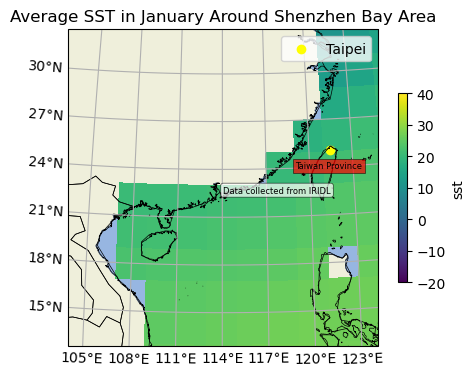

In [212]:
# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=100)

# Set Orthographic projection style
central_lon, central_lat = 114.06, 22.54 # Shenzhen
proj = ccrs.Orthographic(central_lon, central_lat) 

# Create an axes with Orthographic projection style
ax = plt.axes(projection=proj)

# Set a region and plot
extent = [central_lon-10, central_lon+10, central_lat-10, central_lat+10]
ax.set_extent(extent)

# Add features to axes
ax.add_feature(cfeature.LAND, edgecolor='black', zorder=0)
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.coastlines(resolution='10m', linewidth=0.5)
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# Add x-axis, y-axis labels and ticks
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False

# Plot Average January SST Around Shenzhen
shenzhen_sst = mn_clim[0].sel(lat=slice(5, 40), lon=slice(90, 140))
lat = shenzhen_sst.lat.to_numpy()
lon = shenzhen_sst.lon.to_numpy()
shenzhen_sst.plot(ax=ax, transform=ccrs.PlateCarree(),vmin=-20, vmax=40, cbar_kwargs={'shrink': 0.5})

# Add anotation claiming the reference
ax.annotate('Data collected from IRIDL',transform=ccrs.PlateCarree(),xy=(105, 15),xytext=(105, 15),
            fontsize=6,
             bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.7),
            )

# Add title
plt.title('Average SST in January Around Shenzhen Bay Area')

# Label Taiwan with text box 
taipei_lon = 121.5
taipei_lat = 25.05
ax.text(119,24,'Taiwan Province',transform=ccrs.PlateCarree(),fontsize=6,
        bbox=dict(boxstyle='square,pad=0.3', fc='r', ec='black',lw=0.5 ,alpha=0.7))
ax.scatter(taipei_lon, taipei_lat,transform=ccrs.PlateCarree(), marker='o', color='yellow', label='Taipei')

# Add legend
ax.legend()

## End of the Report